Classification of generated review data

In [18]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df= pd.read_csv("fake reviews dataset (1).csv")

# Displaying the first few rows of the dataset
df.head()


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [20]:
df.shape

(40432, 4)

In [21]:
df["sentenceLength"] = df["text_"].apply(lambda x: len(x.split(" ")))

C:\Users\SUGANRAJ S\AppData\Local\Temp\ipykernel_21364\3409602972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["sentenceLength"], kde=False, bins=[0,10,25,50,75,100,125,150,175,200,225,250,275,300,325,350])


Text(0, 0.5, 'Number of Reviews')

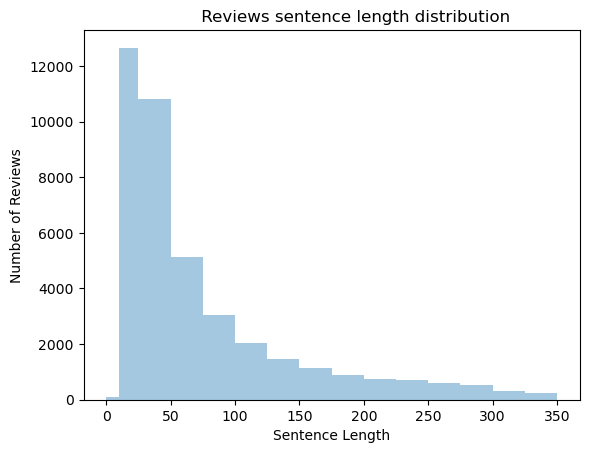

In [22]:
sns.distplot(a=df["sentenceLength"], kde=False, bins=[0,10,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
plt.title("         Reviews sentence length distribution")
plt.xlabel("Sentence Length")
plt.ylabel("Number of Reviews")

Text(0.5, 1.0, '        Review counts by categories')

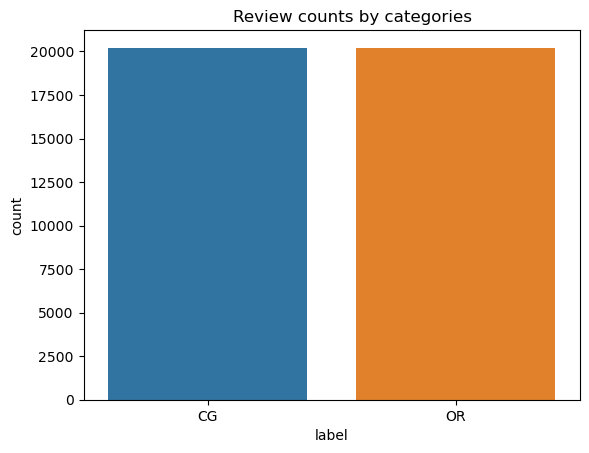

In [23]:
sns.countplot(data=df, x="label")
plt.title("        Review counts by categories")
# plt.yticks(rotation=45)

Text(0.5, 1.0, '        Review counts by categories')

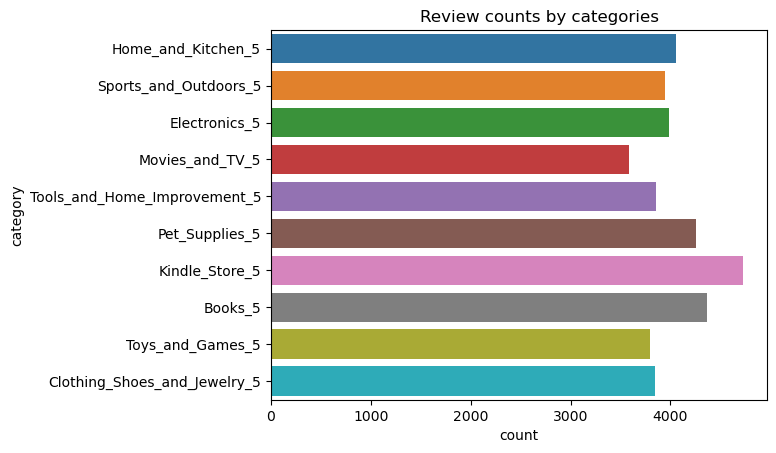

In [24]:
sns.countplot(data=df, y="category")
plt.title("        Review counts by categories")

In [1]:
!pip install transformers
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

In [2]:
!pip install torch

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [10]:
checkpoint = "detector-base.pt"
data = torch.load(checkpoint, map_location=device, weights_only=True)


In [11]:
model_name = "roberta-base"
model = RobertaForSequenceClassification.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
model.load_state_dict(data['model_state_dict'],strict=False)
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [13]:
device="cpu"
query = """I liked nothing about this dress. The only reason I gave it 4 stars is because I ordered the size 6.5 and it fit perfectly. The fabric is a nice thin material and the color is vibrant. It's a little thin on me but it's worth it. The material is soft and comfortable. I love the color and the fit. I'm 5'4" and it fits just right. I'm a size 6 and it's a bit long on me so I ordered a 6 in order to fit the smaller size. I'm 5'3" and it fits perfect and I got it in a medium. It's a nice dress and I'm very pleased with it. I like that it's a bit small for me and I can wear it with a top or skirt. I also like that the fabric is made of a good material. I wear a size 5 and it fits well. I'm 5'3" and it fits just right. I'm 5'6" and it fits just right. I'm 5'4" and it fits just right. I wear a size 10.5 and it's a little tight on me. I have a small waist and it's not too tight on me. It's a nice little dress. I will buy more colors.Very nice dress.  It is well made and it is very comfortable.  I received a free sample and will see if I can wear it again.  I would definitely buy another one.  I am very happy with this dress.I love these boots!  I have been wearing them for almost 8 months now and I love them so much that I purchased a second pair.  They are very comfortable and look great. """
tokens = tokenizer.encode(query)
all_tokens = len(tokens)
tokens = tokens[:tokenizer.model_max_length - 2]
used_tokens = len(tokens)
tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
mask = torch.ones_like(tokens)

with torch.no_grad():
    logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
    probs = logits.softmax(dim=-1)

fake, real = probs.detach().cpu().flatten().numpy().tolist()

print(f"Real Probability: {real}\nFake Probability: {fake}\nAll Tokens: {all_tokens}\nUsed Tokens: {used_tokens}")

Real Probability: 0.0002431118191452697
Fake Probability: 0.9997568726539612
All Tokens: 351
Used Tokens: 351


In [14]:
device="cpu"
query = """I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little "sticky" to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day."""
tokens = tokenizer.encode(query)
all_tokens = len(tokens)
tokens = tokens[:tokenizer.model_max_length - 2]
used_tokens = len(tokens)
tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
mask = torch.ones_like(tokens)

with torch.no_grad():
    logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
    probs = logits.softmax(dim=-1)

fake, real = probs.detach().cpu().flatten().numpy().tolist()

print(f"Real Probability: {real}\nFake Probability: {fake}\nAll Tokens: {all_tokens}\nUsed Tokens: {used_tokens}")


Real Probability: 0.9997749924659729
Fake Probability: 0.00022505191736854613
All Tokens: 408
Used Tokens: 408


In [15]:
encoded_label_dict = {"CG" : 0, "OR" : 1}
def encode_label(x):
    return encoded_label_dict.get(x,-1)

In [25]:
df["target"] = df["label"].apply(lambda x: encode_label(x))

In [26]:
train_df, valid_df = train_test_split(df, test_size=0.2, shuffle=True, stratify=None, random_state=2021)
train_df.shape, valid_df.shape

((32345, 6), (8087, 6))

In [27]:
train_df.label.value_counts()

label
CG    16206
OR    16139
Name: count, dtype: int64

In [28]:
train_df.category.value_counts()

category
Kindle_Store_5                  3812
Books_5                         3492
Pet_Supplies_5                  3410
Home_and_Kitchen_5              3264
Electronics_5                   3216
Sports_and_Outdoors_5           3114
Clothing_Shoes_and_Jewelry_5    3075
Tools_and_Home_Improvement_5    3061
Toys_and_Games_5                3040
Movies_and_TV_5                 2861
Name: count, dtype: int64

In [29]:
valid_df.label.value_counts()

label
OR    4077
CG    4010
Name: count, dtype: int64

In [30]:
valid_df.category.value_counts()

category
Kindle_Store_5                  918
Books_5                         878
Pet_Supplies_5                  844
Sports_and_Outdoors_5           832
Tools_and_Home_Improvement_5    797
Home_and_Kitchen_5              792
Clothing_Shoes_and_Jewelry_5    773
Electronics_5                   772
Toys_and_Games_5                754
Movies_and_TV_5                 727
Name: count, dtype: int64

In [31]:
def predict(query, model, tokenizer, device="cpu"):
    tokens = tokenizer.encode(query)
    all_tokens = len(tokens)
    tokens = tokens[:tokenizer.model_max_length - 2]
    used_tokens = len(tokens)
    tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
    mask = torch.ones_like(tokens)

    with torch.no_grad():
        logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
        probs = logits.softmax(dim=-1)

    fake, real = probs.detach().cpu().flatten().numpy().tolist()
    return real

In [32]:
query = """I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little "sticky" to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day."""
predict(query,model,tokenizer)

0.9997749924659729

In [33]:
preds, preds_probas = [],[]
for i, row in valid_df.iterrows():
    query = row["text_"]
    pred = predict(query,model,tokenizer)
    preds_probas.append(pred)
    if pred >= 0.5:
        preds.append(1)
    else:
        preds.append(0)

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


In [34]:
from sklearn.metrics import confusion_matrix
y_true = valid_df.target.values
y_pred = preds
confusion_matrix(y_true,y_pred)

array([[3700,  310],
       [1143, 2934]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
acc = accuracy_score(y_true,y_pred)
precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

In [36]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 82.03289229627798; Precision:90.44389642416769; Recall:71.96467991169978


In [37]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.76      0.92      0.84      4010
          OR       0.90      0.72      0.80      4077

    accuracy                           0.82      8087
   macro avg       0.83      0.82      0.82      8087
weighted avg       0.83      0.82      0.82      8087



In [38]:
preds_df_rows = []
for i, row in valid_df.reset_index().iterrows():
    query = row["text_"]
    pred_prob = preds_probas[i]
    pred_label = preds[i]
    preds_df_rows.append([pred_prob,pred_label])
preds_df = pd.DataFrame(preds_df_rows, columns=["GPT2_Detector_Model_Probability","GPT2_Detector_Model_Prediction"])

In [39]:
preds_df.to_csv("gpt2_detector_predictions.csv", index=None)

In [40]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
encoded_label_dict = {"CG" : 0, "OR" : 1}
def encode_label(x):
    return encoded_label_dict.get(x,-1)

In [42]:
df["target"] = df["label"].apply(lambda x: encode_label(x))

In [43]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, stratify=None, random_state=2021)

In [44]:
train.head()

,category,rating,label,text_,sentenceLength,target
29115,Books_5,5.0,OR,Nora Roberts never disappoints! Loved the book...,22,1
31611,Books_5,5.0,OR,This was my first time reading this classic an...,115,1
16922,Tools_and_Home_Improvement_5,5.0,CG,"Bought this for my dad, who uses the tools in ...",25,0
5946,Sports_and_Outdoors_5,5.0,CG,These are great beanies. I use them as an exer...,30,0
24761,Kindle_Store_5,4.0,CG,Lots of twists and turns that will make you fe...,25,0


In [45]:
len(train),len(test)

(32345, 8087)

In [46]:
COMMENT = 'text_'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

In [47]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [48]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train[COMMENT])
test_term_doc = vec.transform(test[COMMENT])

C:\Users\SUGANRAJ S\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\SUGANRAJ S\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [49]:
trn_term_doc, test_term_doc

(<32345x88640 sparse matrix of type '<class 'numpy.float64'>'
 	with 3307677 stored elements in Compressed Sparse Row format>,
 <8087x88640 sparse matrix of type '<class 'numpy.float64'>'
 	with 807557 stored elements in Compressed Sparse Row format>)

In [50]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [51]:
x = trn_term_doc
test_x = test_term_doc

In [52]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [53]:
m,r = get_mdl(train["target"])
preds_probas = m.predict_proba(test_x.multiply(r))[:,1]

C:\Users\SUGANRAJ S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
preds = [1 if prob>=0.5 else 0 for prob in preds_probas]
from sklearn.metrics import confusion_matrix
y_true = test.target.values
y_pred = preds
confusion_matrix(y_true,y_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
acc = accuracy_score(y_true,y_pred)
precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

In [55]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 94.71992086064054; Precision:93.61854684512429; Recall:96.07554574441993


In [56]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.96      0.93      0.95      4010
          OR       0.94      0.96      0.95      4077

    accuracy                           0.95      8087
   macro avg       0.95      0.95      0.95      8087
weighted avg       0.95      0.95      0.95      8087



In [58]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from sklearn.model_selection import train_test_split

In [59]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [60]:
encoded_label_dict = {"CG" : 0, "OR" : 1}
def encode_label(x):
    return encoded_label_dict.get(x,-1)

In [61]:
df["target"] = df["label"].apply(lambda x: encode_label(x))

In [62]:
model_name = "roberta-base"
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 1
LEARNING_RATE = 1e-05

In [63]:
tokenizer = RobertaTokenizer.from_pretrained(model_name)

C:\Users\SUGANRAJ S\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [64]:
class Triage(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __getitem__(self, index):
        title = str(self.data.text_[index])
        title = " ".join(title.split())
        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(self.data.target[index], dtype=torch.long)
        } 
    
    def __len__(self):
        return self.len

In [65]:
# Creating the dataset and dataloader
train_dataset, valid_dataset = train_test_split(df, test_size=0.2, shuffle=True, stratify=None, random_state=2021)
train_dataset = train_dataset.reset_index(drop=True)
valid_dataset = valid_dataset.reset_index(drop=True)

print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("VALID Dataset: {}".format(valid_dataset.shape))

training_set = Triage(train_dataset, tokenizer, MAX_LEN)
testing_set = Triage(valid_dataset, tokenizer, MAX_LEN)

FULL Dataset: (40432, 6)
TRAIN Dataset: (32345, 6)
VALID Dataset: (8087, 6)


In [66]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

valid_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **valid_params)

In [67]:
model = RobertaForSequenceClassification.from_pretrained(model_name)
model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [68]:
# Creating the optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

In [69]:
# Function to calcuate the accuracy of the model
def calcuate_accu(big_idx, targets):
    n_correct = (big_idx==targets).sum().item()
    return n_correct

In [70]:
# Defining the training function on the 80% of the dataset for tuning the roberta model
def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)
        
        optimizer.zero_grad()
        outputs = model(ids, attention_mask=mask, labels=targets)
        loss = outputs.loss
        logits = outputs.logits
        tr_loss += loss
        big_val, big_idx = torch.max(logits, dim=1)
        n_correct += calcuate_accu(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _!=0 and _%100==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
            print(f"Training Loss per 100 steps: {loss_step}")
            print(f"Training Accuracy per 100 steps: {accu_step}")

        loss.backward()
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return 

In [71]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0
    n_wrong = 0
    total = 0
    tr_loss = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, attention_mask=mask, labels=targets)
            loss = outputs.loss
            logits = outputs.logits
            tr_loss += loss
            big_val, big_idx = torch.max(logits, dim=1)
            n_correct += calcuate_accu(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _!=0 and _%100==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")
    
    return epoch_accu


In [72]:
tokenizer.pad_token_id

1

In [73]:
for epoch in range(EPOCHS):
    train(epoch)

C:\Users\SUGANRAJ S\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2837: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Training Loss per 100 steps: 0.6136512160301208
Training Accuracy per 100 steps: 63.73762376237624
Training Loss per 100 steps: 0.42310550808906555
Training Accuracy per 100 steps: 77.05223880597015
Training Loss per 100 steps: 0.3460261821746826
Training Accuracy per 100 steps: 82.1843853820598
Training Loss per 100 steps: 0.2991948425769806
Training Accuracy per 100 steps: 85.06857855361596


KeyboardInterrupt: 

In [ ]:
acc = valid(model, testing_loader)
print("Accuracy on validation data = %0.2f%%" % acc)

In [ ]:
# Save the model
output_model_file = 'ft-roberta-amazonreviews.pt'

model_to_save = model
torch.save(model_to_save, output_model_file)

print('All files saved')

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import torch

In [ ]:
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)

In [ ]:
model = torch.load('../../data/classification/models/ft-roberta-amazonreviews.pt')

In [ ]:
device="cuda"
query = """I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little "sticky" to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day."""
tokens = tokenizer.encode(query,return_tensors="pt")
all_tokens = len(tokens)
mask = torch.ones_like(tokens)

with torch.no_grad():
    logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
    probs = logits.softmax(dim=-1)

fake, real = probs.detach().cpu().flatten().numpy().tolist()

print(f"Real Probability: {real}\nFake Probability: {fake}")

In [ ]:
device="cuda"
query = """My old bet was wearing this to the Macy's in January.  This is the first one I've ever had.  I am a 32D, and the first pair I bought were just a little tight.  I'm a bit disappointed.  This is my second pair.  I'm looking forward to wearing them to the Macy's in the fall.  I like the way they look.Love these!These are my favorite.  I have a hard time finding jeans that fit me comfortably, but I have a hard time finding jeans that don't fit.  These jeans are super comfortable and have a great price point.  I have some great jeans to wear for work, but these are the only jeans that I wear for work or for my family.  I will be buying more!  I have a lot of compliments on them.I love these shoes. I love the color and the fit. They fit my body well and are comfortable. I have a wide foot and these fit me well.

I'm 5'4", 130lbs and these fit well. I would recommend them.I wear a size 11.5 in jeans and this fits perfect. I have a narrow foot and this fits perfect. It is very comfortable and fits great. I bought a small and it fit perfectly. I will order another size up.I bought these for my husband, he loves them and he loves them!This is the best pair of sunglasses for the price!  They are so comfortable and easy to use.  I wear them all the time and they don't hurt my feet.  I wear them everyday and my feet are so happy with them!"""
tokens = tokenizer.encode(query,return_tensors="pt")
all_tokens = len(tokens[0])
mask = torch.ones_like(tokens)

with torch.no_grad():
    logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
    probs = logits.softmax(dim=-1)

fake, real = probs.detach().cpu().flatten().numpy().tolist()

print(f"Real Probability: {real}\nFake Probability: {fake}")

In [ ]:
def predict(query, model, tokenizer, device="cuda"):
    tokens = tokenizer.encode(query)
    all_tokens = len(tokens)
    tokens = tokens[:tokenizer.model_max_length - 2]
    used_tokens = len(tokens)
    tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
    mask = torch.ones_like(tokens)

    with torch.no_grad():
        logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
        probs = logits.softmax(dim=-1)

    fake, real = probs.detach().cpu().flatten().numpy().tolist()
    return real

In [ ]:
query = """I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little "sticky" to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day."""
predict(query,model,tokenizer)

In [ ]:
preds, preds_probas = [],[]
for i, row in valid_dataset.iterrows():
    query = row["text_"]
    pred = predict(query,model,tokenizer)
    preds_probas.append(pred)
    if pred >= 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = valid_dataset.target.values
y_pred = preds
confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
acc = accuracy_score(y_true,y_pred)
precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

In [ ]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

In [ ]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))